In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
import re
from nltk.stem import WordNetLemmatizer
import spacy

In [ ]:
#!pip install texthero

In [2]:
data=pd.read_csv("K8 Reviews v0.2.csv")

In [3]:
data.head()

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


<AxesSubplot:>

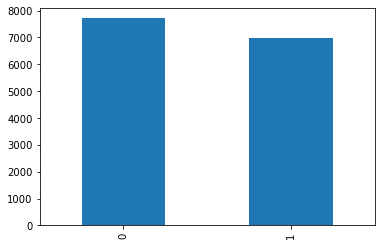

In [4]:
data['sentiment'].value_counts().plot(kind='bar')

In [5]:
data.shape

(14675, 2)

## 2.Normalise and arrange reviews into list

In [6]:
reviews=[review.lower() for review in data['review'].values]

In [7]:
reviews[0]

'good but need updates and improvements'

## 3.Tokenize using word_tokenizer

In [9]:
tokenized_reviews=[word_tokenize(review) for review in reviews]

In [57]:
print(tokenized_reviews[0:2])

[['good', 'but', 'need', 'updates', 'and', 'improvements'], ['worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.']]


In [72]:
review=['good', 'but', 'need', 'updates', 'and', 'improvements']
print(pos_tag(review))

[('good', 'JJ'), ('but', 'CC'), ('need', 'VBP'), ('updates', 'NNS'), ('and', 'CC'), ('improvements', 'NNS')]


## 4.POS Tagging and filter out noun pos

In [101]:
filter_reviews_noun=[]
for review in tokenized_reviews:
    pos=[" ".join(text for text, pos in pos_tag(review) if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'))]
    filter_reviews_noun.append(pos)

In [103]:
filter_reviews=[]
for review in tokenized_reviews:
    pos1=[" ".join(review) for text, pos in pos_tag(review) if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    filter_reviews.append(pos1)

In [120]:
len(filter_reviews_noun), filter_reviews_noun[3]

(14675, [''])

In [122]:
filter_reviews_df=pd.DataFrame({'reviews':filter_reviews})

In [124]:
filter_reviews_df.head()

,reviews
0,"[good but need updates and improvements, good ..."
1,"[worst mobile i have bought ever , battery is ..."
2,[when i will get my 10 % cash back .... its al...
3,[]
4,[the worst phone everthey have changed the las...


In [119]:
len(filter_reviews), filter_reviews[3]

(14675, [])

In [117]:
filter_reviews_new=[]
for text in filter_reviews[0:3]:
    #print(text[0])
    filter_reviews_new.append(text[-1])

In [118]:
filter_reviews_new

['good but need updates and improvements',
 "worst mobile i have bought ever , battery is draining like hell , backup is only 6 to 7 hours with internet uses , even if i put mobile idle its getting discharged.this is biggest lie from amazon & lenove which is not at all expected , they are making full by saying that battery is 4000mah & booster charger is fake , it takes at least 4 to 5 hours to be fully charged.do n't know how lenovo will survive by making full of us.please don ; t go for this else you will regret like me .",
 'when i will get my 10 % cash back .... its already 15 january ..']

In [94]:
filter_reviews_new=[]
for review in filter_reviews:
    if review not in filter_reviews_new:
        filter_reviews_new.append(review)

In [24]:
st=stopwords.words("english")

In [28]:
print([word_tokenize(" ".join(re.findall(r'\w+', t,flags = re.UNICODE )).lower()) for t in sent_tokenize(samp.replace("'", "") )])

[['worst', 'mobile', 'i', 'have', 'bought', 'ever', 'battery', 'is', 'draining', 'like', 'hell', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged', 'this', 'is', 'biggest', 'lie', 'from', 'amazon', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', 'booster', 'charger', 'is', 'fake', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged', 'dont', 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us', 'please', 'don', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me']]


In [29]:
def Remove_Stopwords(word_list, lang='english'):
    """Function removes english stopwords
    Args:
        word_list  : list of words
    Return:
        The return value. List of words
    """
    content = []
    stopwords_list = stopwords.words(lang)
    #print(type(word_list))
    #for word in word_list:
    #    print(word)
    #    if word.lower() not in stopwords_list:
    #        content.append(word)
    content = [w for w in word_list if w.lower() not in stopwords_list]
    #print(content)
    return content

In [41]:
rs=Remove_Stopwords(['worst', 'mobile', 'i', 'have', 'bought', 'ever', 'battery', 'is', 'draining', 'like', 'hell', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged', 'this', 'is', 'biggest', 'lie', 'from', 'amazon', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', 'booster', 'charger', 'is', 'fake', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged', 'dont', 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us', 'please', 'don', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me'])
print(rs)

['worst', 'mobile', 'bought', 'ever', 'battery', 'draining', 'like', 'hell', 'backup', '6', '7', 'hours', 'internet', 'uses', 'even', 'put', 'mobile', 'idle', 'getting', 'discharged', 'biggest', 'lie', 'amazon', 'lenove', 'expected', 'making', 'full', 'saying', 'battery', '4000mah', 'booster', 'charger', 'fake', 'takes', 'least', '4', '5', 'hours', 'fully', 'charged', 'dont', 'know', 'lenovo', 'survive', 'making', 'full', 'us', 'please', 'go', 'else', 'regret', 'like']


In [44]:
def Simplify_Punctuation(text):
    """
    This function simplifies doubled or more complex punctuation. The exception is '...'.
    """
    corrected = str(text)
    corrected = re.sub(r'([!?,;])\1+', r'\1', corrected)
    corrected = re.sub(r'\.{2,}', r'...', corrected)
    return corrected

In [55]:
text="hai ? how ! r u"
corrected = str(text)
corrected = re.sub(r'([!?,;])\1+', r'\1', corrected)
corrected = re.sub(r'\.{2,}', r'...', corrected)
print(corrected)

hai ? how ! r u


In [45]:
sp=Simplify_Punctuation("hai ? my ! name")
sp

'hai ? my ! name'

In [31]:
def Lemmatize_WordNet(words_list):
    wnl = WordNetLemmatizer()
    encoded_list = []
    for word in words_list:
        encoded_list.append(wnl.lemmatize(word, pos="v"))#.encode("utf8"))
    #print(encoded_list)
    return encoded_list

In [51]:
lst=[]
lw=Lemmatize_WordNet(rs)
print(lst.append(" ".join(lw)))
lst

None


['worst mobile buy ever battery drain like hell backup 6 7 hours internet use even put mobile idle get discharge biggest lie amazon lenove expect make full say battery 4000mah booster charger fake take least 4 5 hours fully charge dont know lenovo survive make full us please go else regret like']

In [36]:
def tokenize(txt):
    """Function computes Tokenizes into sentences, strips punctuation/abbr, 
       converts to lowercase and tokenizes words
    Args:
        txt  : text documents
    Return:
        The return value. Tokenized words
    """
    return [word_tokenize(" ".join(re.findall(r'\w+', t,flags = re.UNICODE )).lower()) 
                for t in sent_tokenize(txt.replace("'", ""))]

In [52]:
def Apply_Stopwords_punctuation_lemmatize(reviews):
    PreprocessReviews = []
    for review in reviews:
        lemmetized = []
        review = Simplify_Punctuation(review)  # Remove Punctuation        
        sentences = tokenize(review)
        for sentence in sentences:
            words = Remove_Stopwords(sentence)         # Remove Stopwords
            words = Lemmatize_WordNet(words)           # lemmatize 
            # lets's skip short sentences with less than 3 words
            if len(words) < 3:
                continue
            lemmetized.append(" ".join(words))
        PreprocessReviews.append(" ".join(lemmetized))
    return PreprocessReviews

In [54]:
PreProcessReviews = Apply_Stopwords_punctuation_lemmatize(filter_reviews)

In [113]:
len(PreProcessReviews)

93229

In [114]:
PreProcessReviews[0]

['good need update improvements',
 'good need update improvements',
 'worst mobile buy ever battery drain like hell backup 6 7 hours internet use even put mobile idle get discharge biggest lie amazon lenove expect make full say battery 4000mah booster charger fake take least 4 5 hours fully charge dont know lenovo survive make full us please go else regret like',
 'worst mobile buy ever battery drain like hell backup 6 7 hours internet use even put mobile idle get discharge biggest lie amazon lenove expect make full say battery 4000mah booster charger fake take least 4 5 hours fully charge dont know lenovo survive make full us please go else regret like',
 'worst mobile buy ever battery drain like hell backup 6 7 hours internet use even put mobile idle get discharge biggest lie amazon lenove expect make full say battery 4000mah booster charger fake take least 4 5 hours fully charge dont know lenovo survive make full us please go else regret like']